<a href="https://colab.research.google.com/github/sjkchang/CMPE255-Assignment-2/blob/master/notebooks/Assignment2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


In [ ]:
!pip install pycaret


In [14]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
%ls

/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
 3D-Print-Anomoly-Detection/
 Amazon-stock-time-series.csv
 CarPrice_Assignment.csv
'Credit Card Customer Data - Clustering.csv'
 falling-elders-anomoly-detection/
 flagged/
 Groceries_dataset-association-rules-mining.csv
 heartattack.csv
 logs.log
 my_first_pipeline.pkl
 secondhand-car-price-regression.csv


In [5]:
from pycaret.datasets import get_data
data = get_data('Credit Card Customer Data - Clustering')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 999, use_gpu=True)

,Description,Value
0,Session id,999
1,Original data shape,"(660, 7)"
2,Transformed data shape,"(660, 7)"
3,Numeric features,7
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,True


In [7]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4597,816.9076,0.7349,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,Cluster 3
1,2,38414,50000,3,0,10,9,Cluster 3
2,3,17341,50000,7,1,3,4,Cluster 2
3,4,40496,30000,5,1,1,4,Cluster 2
4,5,47437,100000,6,0,12,3,Cluster 3
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,Cluster 3
656,657,60732,84000,10,1,13,2,Cluster 3
657,658,53834,145000,8,1,9,1,Cluster 1
658,659,80655,172000,10,1,15,0,Cluster 1


In [9]:
# plot pca cluster plot
plot_model(kmeans, plot = 'cluster')

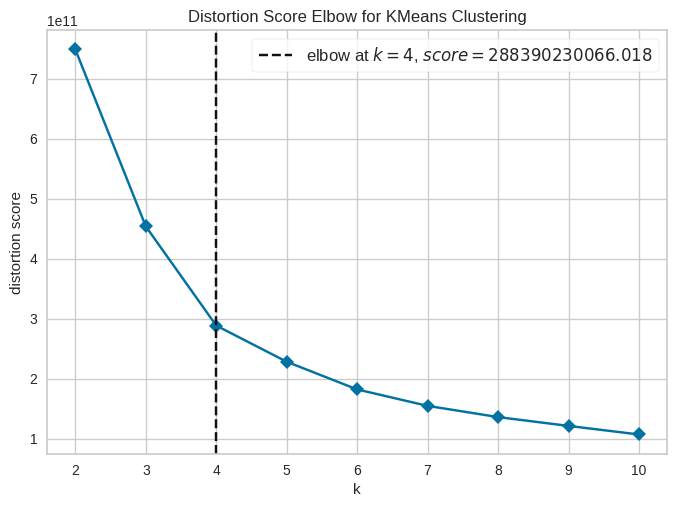

In [10]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

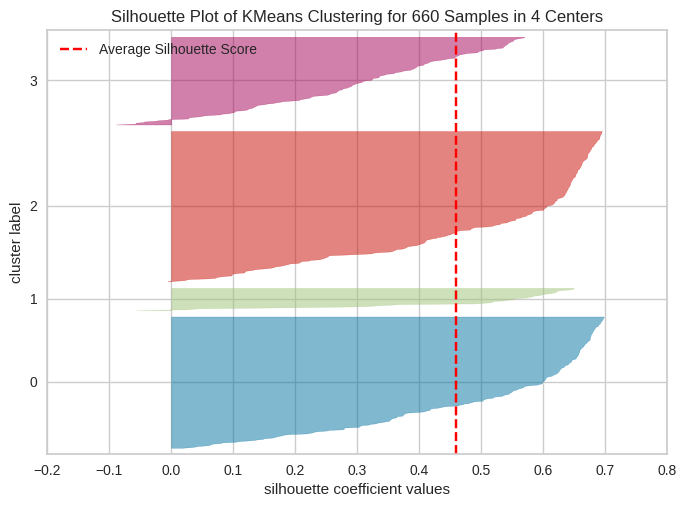

In [11]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

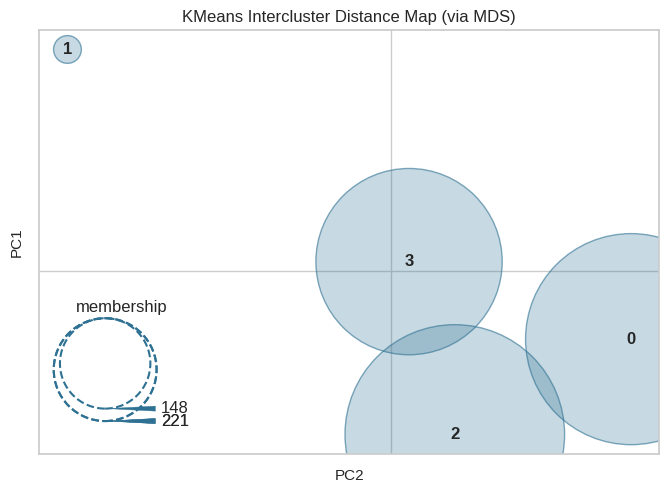

In [15]:
# plot silhouette
plot_model(kmeans, plot = 'distance')

In [17]:
# plot silhouette
plot_model(kmeans, plot = 'distribution')

In [13]:
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.0,87073.0,100000.0,2.0,1.0,1.0,0.0,Cluster 3
1,2.0,38414.0,50000.0,3.0,0.0,10.0,9.0,Cluster 3
2,3.0,17341.0,50000.0,7.0,1.0,3.0,4.0,Cluster 2
3,4.0,40496.0,30000.0,5.0,1.0,1.0,4.0,Cluster 2
4,5.0,47437.0,100000.0,6.0,0.0,12.0,3.0,Cluster 3
...,...,...,...,...,...,...,...,...
655,656.0,51108.0,99000.0,10.0,1.0,10.0,0.0,Cluster 3
656,657.0,60732.0,84000.0,10.0,1.0,13.0,2.0,Cluster 3
657,658.0,53834.0,145000.0,8.0,1.0,9.0,1.0,Cluster 1
658,659.0,80655.0,172000.0,10.0,1.0,15.0,0.0,Cluster 1
